# Diving into Data Science with Regression

Every data science project can and should follow a given structure. In this lesson, we introduce this structure and use one-dimensional regression as an example. To the best of our capabilities, the proposed structure should be followed in practice.

## PPDAC: Problem, Plan, Data, Analysis and Conclusion

![from creativemaths.net/blog](https://learnandteachstatistics.files.wordpress.com/2015/07/ppdac_complete_background.png)

- **Problem**: understanding and defining the problem, how do we go about answering?
- **Plan**: What to measure and how? Study design? Recording? Collecting?
- **Data**: collection, management, cleaning
- **Analysis**: sort data; construct tables, graphs; look for patterns; hypothesis generation
- **Conclusion**: Communication, Conclusions, Interpretation, New Ideas (Repeat Cycle if required)

For more details, see Wolff, A. et al, "Creating an Understanding of Data Literacy for a Data-driven Society", The Journal of Community Informatics, Vol 12, issue 3, 2016, doi:[10.15353/joci.v12i3.3275](https://www.ci-journal.net/index.php/JoCI/article/view/3275)

## Problem statement

![from commons.wikimedia](https://upload.wikimedia.org/wikipedia/commons/0/0d/Blue_iceberg_south_polar_circle.jpg)

- I like to know if the amount of ice on polar caps is really decreasing per year. 
- For this, I'd like to know how much ice is found during the coldest period of the polar year (March).
- it might be nice to know by how much the polar is getting less per year.

## Plan

- I need data from the polar region that reports the monthly ice area over last years. 
- It might be nice if this data goes back to the 19th century so that I can be sure of the trend.
- This data should not be large and can be stored locally so that I can always return to it.
- I am mostly interested on the ice surface area as a proxy metric/observable for the amount of ice.

## Data

- Updated June 2020
- Can be obtained from [here](http://sustainabilitymath.org/excel/ArcticIceDataMonth-R.csv) 
- Data from the National Snow and Ice Data Center: http://nsidc.org; Sea Ice Index page http://nsidc.org/data/g02135.html; Data Located at  ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/
 
> Important Note: The "extent" column includes the area near the pole not
> imaged by the sensor. It is assumed to be entirely ice covered with at
> least 15% concentration. However, the "area" column excludes the area not
> imaged by the sensor. This area is 1.19 million square kilometers for SMMR
> (from the beginning of the series through June 1987) and 0.31 million
> square kilometers for SSM/I (from July 1987 to present). Therefore, there
> is a discontinuity in the "area" data values in this file at the June/July
> 1987 boundary.
> 



## Import data

- using `pandas` import the .csv-file of your data
- check data types and consistency

In [1]:
import pandas as pd
print("pandas version:", pd.__version__)

pandas version: 1.3.5


In [2]:
df = pd.read_csv("http://sustainabilitymath.org/excel/ArcticIceDataMonth-R.csv")

In [9]:
df.head()
df.tail()

,year,Years after 1970,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
36,2015,45,13.6,14.40,14.37,13.89,12.47,10.88,8.38,5.60,4.62,6.97,9.85,12.04
37,2016,46,13.46,14.20,14.40,13.68,11.92,10.41,7.94,5.37,4.53,6.08,8.66,11.46
38,2017,47,13.19,14.12,14.29,13.75,12.63,10.76,7.94,5.48,4.82,6.77,9.49,11.74
39,2018,48,13.08,13.97,14.30,13.70,12.23,10.78,8.27,5.61,4.79,6.13,9.82,11.86
40,2019,49,13.56,14.40,14.55,13.45,12.16,10.53,7.59,5.03,4.32,5.66,9.33,11.95


In [21]:
df.iloc[:,2] = pd.to_numeric(df.iloc[:,2], errors="coerce")
df.iloc[:,13] = pd.to_numeric(df.iloc[:,13], errors="coerce")
df.iloc[:,2] = df.iloc[:,2].fillna(method="ffill")
df.iloc[:,13] = df.iloc[:,13].fillna(method="ffill")
print(df.iloc[:,13])

0     13.34
1     13.59
2     13.34
3     13.64
4     13.30
5     12.99
6     13.05
7     13.22
8     13.22
9     13.63
10    13.39
11    13.11
12    12.95
13    13.41
14    13.32
15    13.27
16    12.92
17    12.86
18    13.08
19    12.76
20    12.64
21    12.64
22    12.49
23    12.61
24    12.59
25    12.55
26    12.23
27    11.95
28    12.03
29    12.36
30    12.20
31    11.83
32    12.15
33    12.01
34    12.18
35    12.35
36    12.04
37    11.46
38    11.74
39    11.86
40    11.95
Name: Dec, dtype: float64


In [22]:
import numpy as np
print(f"numpy version: {np.__version__}")

numpy version: 1.21.5


In [24]:
firstrow = df.iloc[0,2:].values
lastrow = df.iloc[-1,2:].values
print(firstrow)
print(lastrow)

[15.41 16.18 16.34 15.45 13.86 12.53 10.31  8.04  7.05  8.75 10.94 13.34]
[13.56 14.4  14.55 13.45 12.16 10.53  7.59  5.03  4.32  5.66  9.33 11.95]


In [25]:
minfirst, maxfirst = np.argmin(firstrow), np.argmax(firstrow)
minlast, maxlast = np.argmin(lastrow), np.argmax(lastrow)

print(f"colest month at 97 is at {minfirst}, and the hottest month at 97 is at {maxfirst} ")
print(f"colest month at 2019 is at {minlast}, and the hottest month at 2019 is at {maxlast}")

colest month at 97 is at 8, and the hottest month at 97 is at 2 
colest month at 2019 is at 8, and the hottest month at 2019 is at 2


## Analysis

Let's look at the data first.

In [4]:
import matplotlib.pyplot as plt
print(f"numpy version: {np.__version__}")
plt.style.use('dark_background')

numpy version: 1.21.5


Text(0, 0.5, 'amount / a.u')

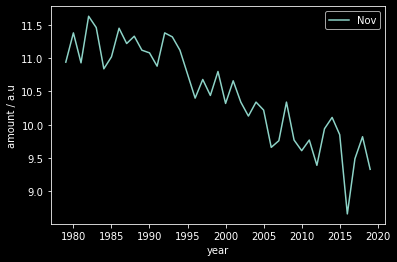

In [29]:
ax = df.plot(x="year", y="Nov", kind="line")
ax.set_ylabel("amount / a.u")

Perform the linear regression

In [5]:
import sklearn
print("Scikit-learn version:", sklearn.__version__)

Scikit-learn version: 1.0.2


In [31]:
from sklearn.linear_model import LinearRegression

x_train = df[['year']].values

y_train = df[['Mar']].values

model = LinearRegression()

model.fit(x_train, y_train)


LinearRegression()

In [34]:
print("y = a*x + b = {:1.5f}*x + {:1.5f}".format(model.coef_[0][0], model.intercept_[0]))

y = a*x + b = -0.04173*x + 98.69563


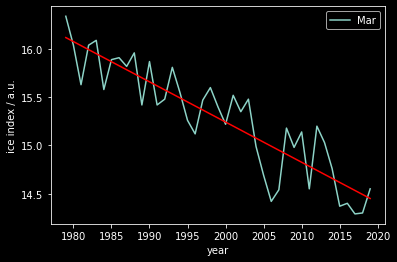

In [37]:
yhat_pred = model.predict(x_train)
ax = df.plot(x="year", y="Mar", kind="line")
ax.set_ylabel("ice index / a.u.")
ax.plot(x_train, yhat_pred, color="red")

In [40]:
def mse(y, yhat):
  "calculate mean square error"
  assert y.shape == yhat.shape, f"y shape is {y.shep}, yhat shape is {yhat.shape} "

  return ((y-yhat)**2).sum()/y.size

In [41]:
from sklearn.metrics import mean_squared_error

mse = mse(y_train, yhat_pred)
sk_mse = mean_squared_error(y_train, yhat_pred)

print(mse, sk_mse)

0.06168049587830355 0.06168049587830355


In [42]:
print(f"ice wil end at {int(np.round(model.intercept_[0]/(-1*model.coef_[0][0])))}")

ice wil end at 2365


## Conclusion

What do the results tell you?

The ice will disapear near 2365